In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [2]:
df = pd.read_csv('data/Electric_Production.csv')

In [3]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [4]:
df.head(5)

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [7]:
df.rename(columns={'IPG2211A2N': 'production'}, inplace=True)
df.head(5)

,production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


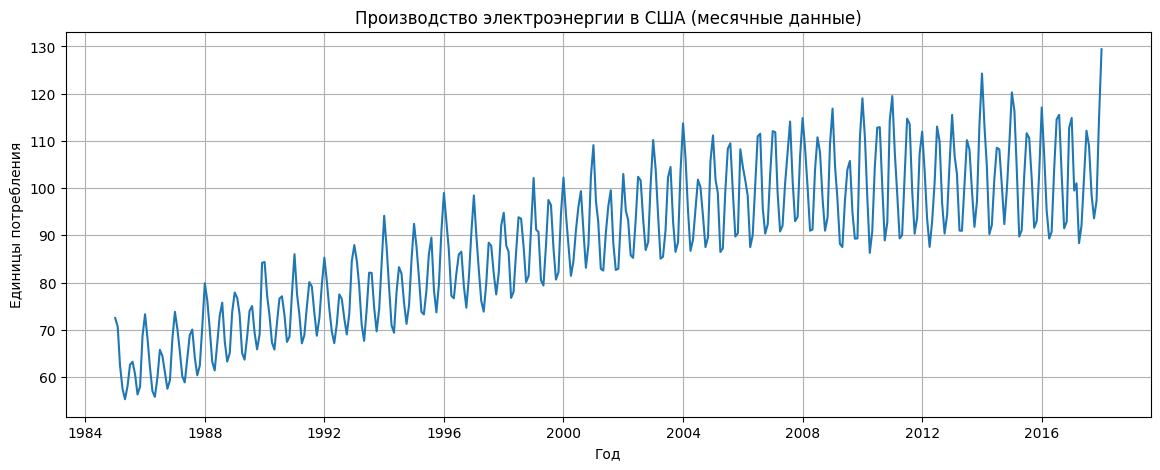

In [8]:
plt.figure(figsize=(14, 5))
plt.plot(df['production'])
plt.title('Производство электроэнергии в США (месячные данные)')
plt.xlabel('Год')
plt.ylabel('Единицы потребления')
plt.grid(True)
plt.show()

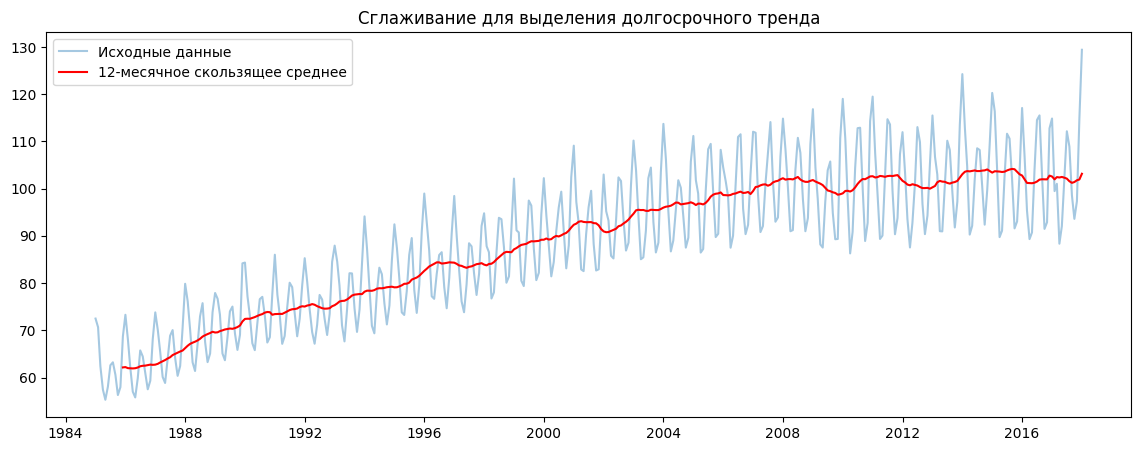

In [9]:
df['rolling_12'] = df['production'].rolling(window=12).mean()
plt.figure(figsize=(14, 5))
plt.plot(df['production'], alpha=0.4, label='Исходные данные')
plt.plot(df['rolling_12'], color='red', label='12-месячное скользящее среднее')
plt.legend()
plt.title('Сглаживание для выделения долгосрочного тренда')
plt.show()

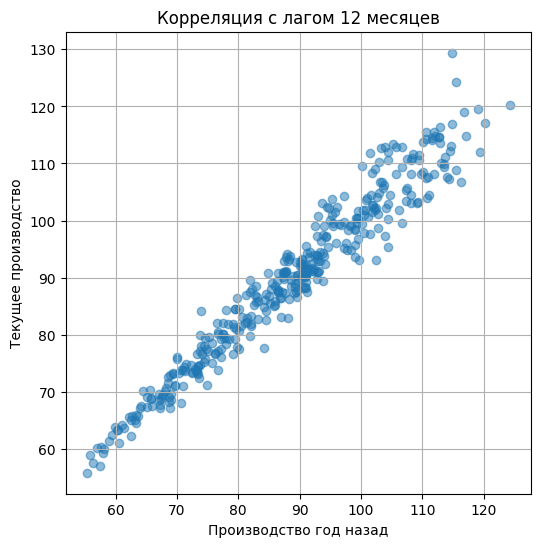

In [10]:
df['lag_12'] = df['production'].shift(12)
plt.figure(figsize=(6, 6))
plt.scatter(df['lag_12'], df['production'], alpha=0.5)
plt.xlabel('Производство год назад')
plt.ylabel('Текущее производство')
plt.title('Корреляция с лагом 12 месяцев')
plt.grid(True)
plt.show()

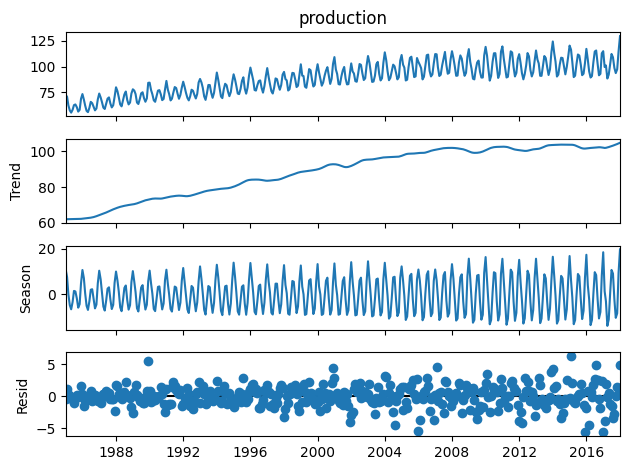

In [11]:
stl = STL(df['production'], period=12)
res = stl.fit()
res.plot()
plt.show()

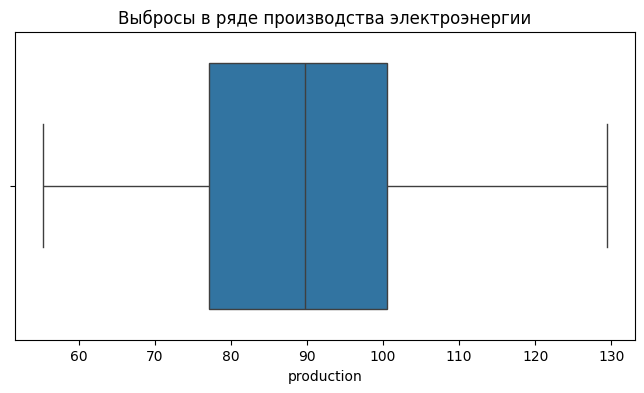

In [12]:
import seaborn as sns
   
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['production'])
plt.title('Выбросы в ряде производства электроэнергии')
plt.show()

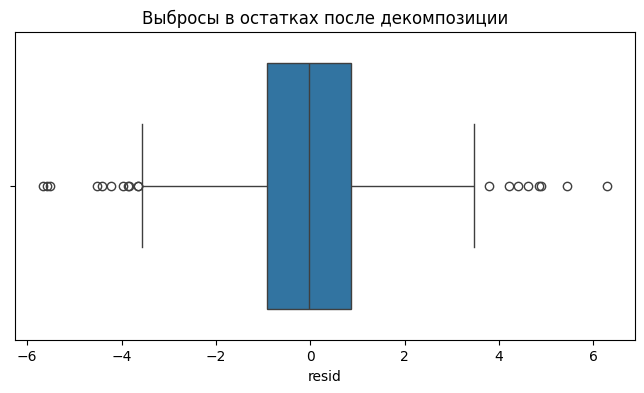

In [13]:
df['resid'] = res.resid
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['resid'])
plt.title('Выбросы в остатках после декомпозиции')
plt.show()

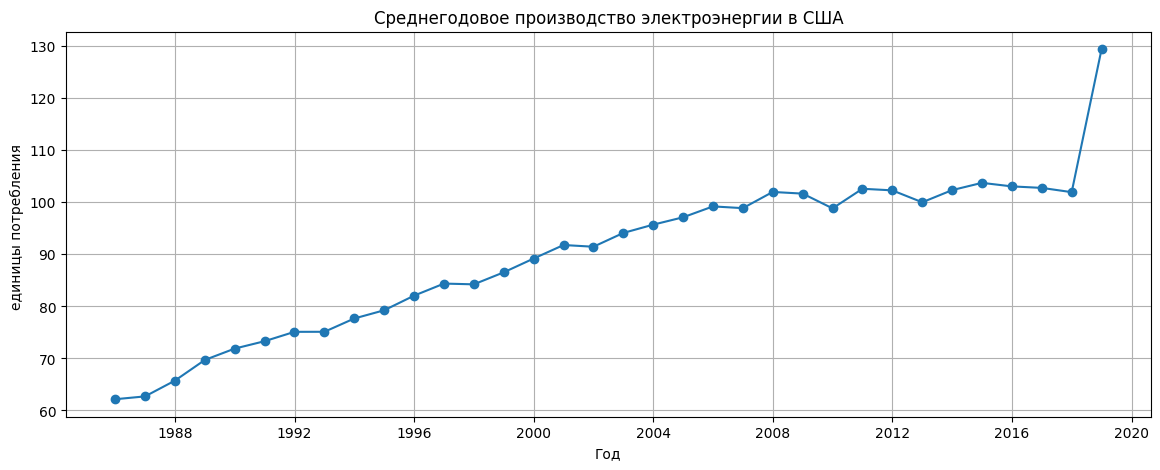

In [14]:
# Годовое усреднение производства электроэнергии
df_yearly = df['production'].resample('YE').mean()
plt.figure(figsize=(14, 5))
plt.plot(df_yearly, marker='o')
plt.title('Среднегодовое производство электроэнергии в США')
plt.xlabel('Год')
plt.ylabel('единицы потребления ')
plt.grid(True)
plt.show()